In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/Users/sathvikchava/my files/Data Analyis 1/project/project_data.xlsx', sheet_name='data')

In [5]:
# Converting variables ( yes/no to 0/1 )
df['MealIncluded'] = df['MealIncluded'].replace({'Yes': 1, 'No': 0})
df['WifiAvailable'] = df['WifiAvailable'].replace({'Yes': 1, 'No': 0})
df['InFlightEntertainment'] = df['InFlightEntertainment'].replace({'Yes': 1, 'No': 0})
df['HolidayPeriod'] = df['HolidayPeriod'].replace({'Yes': 1, 'No': 0})

/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_82423/2923496170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MealIncluded'] = df['MealIncluded'].replace({'Yes': 1, 'No': 0})
/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_82423/2923496170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WifiAvailable'] = df['WifiAvailable'].replace({'Yes': 1, 'No': 0})
/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_82423/2923496170.py:4: FutureWarning: Downcasting behavior in `replace` is deprec

# Hypothesis Questions

## 1)Do weather conditions affect flight ticket prices?
#### ANOVA for Weather Conditions vs Flight Price

In [14]:
weather=[
    # subsetting flight prices for each weather condition
    df[df['WeatherConditions'] == condition]['FlightPrice'] 
    # Iterate each weather condition
    for condition in df['WeatherConditions'].unique()
    ]

# performing oneway ANOVA 
oneway_anova_weather= stats.f_oneway(*weather)

# Printing the results
print(f"ANOVA for Weather Conditions: F-statistic = {oneway_anova_weather.statistic}, p-value = {oneway_anova_weather.pvalue}")


ANOVA for Weather Conditions: F-statistic = 0.42834186652987455, p-value = 0.7326962882537806


/var/folders/5l/ylwbn_b1651806t5hwccfl1c0000gn/T/ipykernel_82423/2323932521.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WeatherConditions', y='FlightPrice', data=df, ci=None)


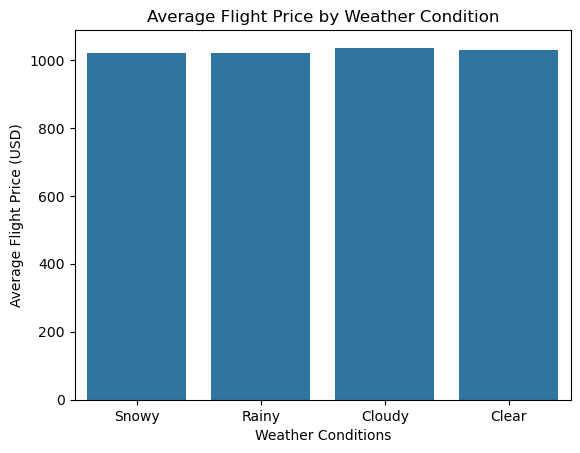

In [16]:
# Plot 1: Average Flight Price by Weather Condition
sns.barplot(x='WeatherConditions', y='FlightPrice', data=df, ci=None)
# Adding titles and lables for chart
plt.title('Average Flight Price by Weather Condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Flight Price (USD)')
plt.show()


## 2) Does the holiday season have high ticket prices?
### ANOVA for Holiday Period vs. Flight Price

In [21]:
holiday_Groups=[
    df[df['HolidayPeriod'] == status]['FlightPrice']  # Subset flight prices 
    for status in df['HolidayPeriod'].unique()        # Iterate each holiday status
]
# Performing one-way ANOVA
oneway_anova_holiday= stats.f_oneway(*holiday_Groups)
# printing the results 
print(f"ANOVA for Holiday Period: F-statistic = {oneway_anova_holiday.statistic}, p-value = {oneway_anova_holiday.pvalue}")

ANOVA for Holiday Period: F-statistic = 4.12649683749924, p-value = 0.04224305435150039


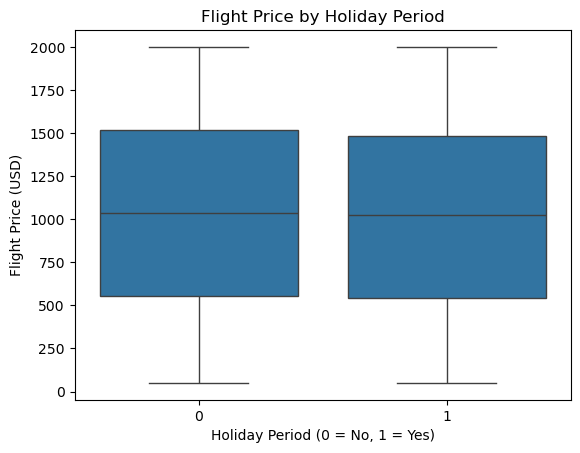

In [23]:
# Plot for Flight Price by Holiday Period
sns.boxplot(x='HolidayPeriod', y='FlightPrice', data=df)
plt.title('Flight Price by Holiday Period')
plt.xlabel('Holiday Period (0 = No, 1 = Yes)')
plt.ylabel('Flight Price (USD)')
plt.show()

## 3) Does advance booking yield lower prices?

### Regression: Advance Booking Days vs. Flight Price

In [27]:
# defining independent (X1) and dependent (Y1) variables
X1 = df['AdvanceBookingDays']  
y1 = df['FlightPrice']  
X1 = sm.add_constant(X1)
# fitting the regression model
model1 = sm.OLS(y1, X1).fit()
# printing the result
print("Regression: Advance Booking Days vs Flight Price")
print(model1.summary())

Regression: Advance Booking Days vs Flight Price
                            OLS Regression Results                            
Dep. Variable:            FlightPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02136
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.884
Time:                        17:27:06   Log-Likelihood:                -77466.
No. Observations:               10000   AIC:                         1.549e+05
Df Residuals:                    9998   BIC:                         1.550e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

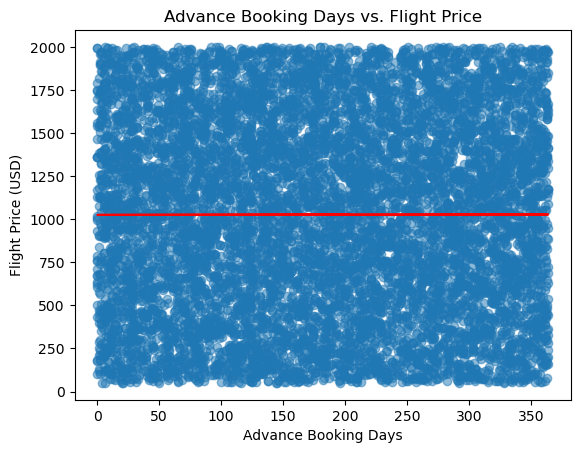

In [29]:
# plot
plt.scatter(df['AdvanceBookingDays'], df['FlightPrice'], alpha=0.5)
plt.plot(df['AdvanceBookingDays'], model1.predict(X1), color='red')  # Regression line in red
plt.title('Advance Booking Days vs. Flight Price')
plt.xlabel('Advance Booking Days')
plt.ylabel('Flight Price (USD)')
plt.show()

## 4) Regression: In-flight Add-ons vs. Flight Price
###  How do in-flight add-ons ( like meals, Wi-Fi, and entertainment) affect the price?

In [32]:
# multiple linear regression
X2 = df[['MealIncluded', 'WifiAvailable', 'InFlightEntertainment']]  # Select independent variables
y2 = df['FlightPrice']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
print("Regression: In-flight Add-ons vs. Flight Price")
print(model2.summary())

Regression: In-flight Add-ons vs. Flight Price
                            OLS Regression Results                            
Dep. Variable:            FlightPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3314
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.803
Time:                        17:43:25   Log-Likelihood:                -77466.
No. Observations:               10000   AIC:                         1.549e+05
Df Residuals:                    9996   BIC:                         1.550e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

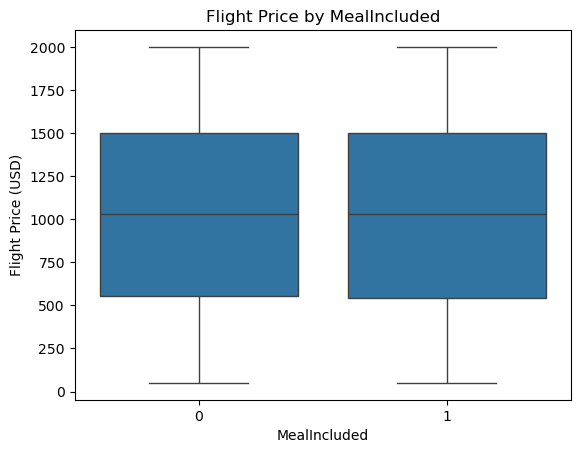

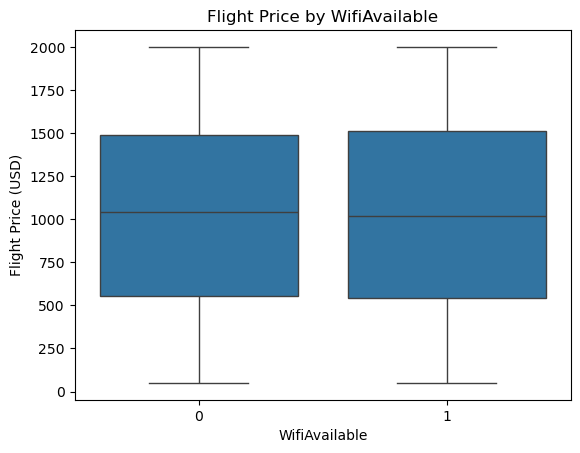

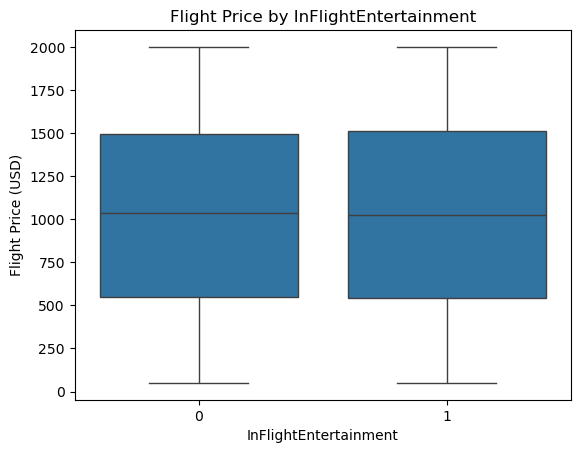

In [34]:
# Plot for Flight Price by Add-ons
cols = ['MealIncluded', 'WifiAvailable', 'InFlightEntertainment']
for col in cols:
    sns.boxplot(x=col, y='FlightPrice', data=df)
    plt.title(f'Flight Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Flight Price (USD)')
    plt.show()

## 5) Regression: Luggage Allowance vs. Flight Price
###  Does luggage allowance have a relationship with the price of the ticket?

In [39]:
# simple linear regression
X3 = df['LuggageAllowance']
y3 = df['FlightPrice']
X3 = sm.add_constant(X3)
# fitting the model
model3 = sm.OLS(y3, X3).fit()
# printing the results
print("Regression: Luggage Allowance vs Flight Price")
print(model3.summary())

Regression: Luggage Allowance vs Flight Price
                            OLS Regression Results                            
Dep. Variable:            FlightPrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.384
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.123
Time:                        17:46:19   Log-Likelihood:                -77465.
No. Observations:               10000   AIC:                         1.549e+05
Df Residuals:                    9998   BIC:                         1.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

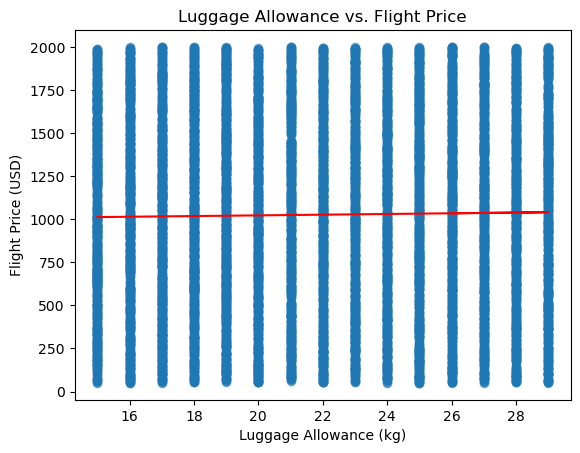

In [41]:
# Plot: Luggage Allowance vs. Flight Price
plt.scatter(df['LuggageAllowance'], df['FlightPrice'], alpha=0.5)
plt.plot(df['LuggageAllowance'], model3.predict(X3), color='red')
plt.title('Luggage Allowance vs. Flight Price')
plt.xlabel('Luggage Allowance (kg)')
plt.ylabel('Flight Price (USD)')
plt.show()